<a href="https://colab.research.google.com/github/plthiyagu/AI-Engineering/blob/master/07-Machine%20Learning/Anomaly_Detection_Using_Self_Organizing_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/sethns/Self-Organizing-Maps/blob/main/Anomalies%20Detection%20using%20Self%20Organizing%20Maps%20(SOMs).ipynb


https://www.analyticsvidhya.com/blog/2021/09/beginners-guide-to-anomaly-detection-using-self-organizing-maps/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

In [ ]:
!pip install minisom

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom

In [4]:
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/Credit_Card_Applications.csv")
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [6]:
# Shape of the data:
data.shape

(690, 16)

In [7]:
# Info of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


3. Defining X variables
For Self Organizing Maps, only require X variables. In this case, we do not require the customerID as it is a unique variable and neither the Y (target variable) hence not using either.

Though, the target variable (Y) can be used to understand if the output is matching with input or not.



In [8]:
# Defining X variables for the input of SOM

X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

In [9]:
# X variables:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0


In [10]:
# Y variables:
pd.DataFrame(y)


,0
0,0
1,0
2,0
3,1
4,1
...,...
685,1
686,0
687,1
688,1


In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [12]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


In [13]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

In [16]:
# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(X)

# Training
som.train_random(X, iterations)

In [20]:
# Weights are:
wts = som.get_weights()

In [22]:
# Shape of the weight are:
wts.shape

(10, 10, 13)

In [23]:
# Returns the distance map from the weights:
som.distance_map()

array([[0.18498209, 0.38319032, 0.46576774, 0.3705631 , 0.36598211,
        0.33968624, 0.30925948, 0.42548698, 0.4763074 , 0.23928836],
       [0.33837166, 0.62526998, 0.57852098, 0.79899776, 0.62899947,
        0.67171944, 0.68435468, 0.59745654, 0.69156511, 0.37114838],
       [0.37096588, 0.49896023, 0.76893959, 0.61279736, 0.67151673,
        0.71614569, 0.61134088, 0.75693654, 0.55016854, 0.36167244],
       [0.39684052, 0.88314972, 0.78306976, 1.        , 0.7555279 ,
        0.64975122, 0.66080069, 0.82558571, 0.61087404, 0.41705191],
       [0.48974142, 0.61049762, 0.80485529, 0.78910355, 0.73026102,
        0.85869373, 0.70129062, 0.65796805, 0.65485483, 0.39464564],
       [0.35757668, 0.54161715, 0.5952337 , 0.50994587, 0.66869567,
        0.70742973, 0.72628557, 0.66538573, 0.44718857, 0.31243779],
       [0.30861632, 0.72063001, 0.72807433, 0.57939345, 0.62463932,
        0.67272993, 0.76224658, 0.63151186, 0.72671142, 0.44997751],
       [0.48098441, 0.85537145, 0.8213131

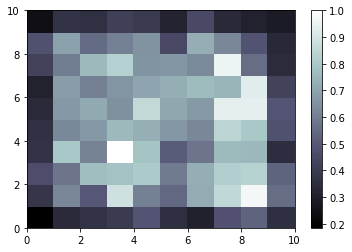

In [24]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T) # Distance map as background
colorbar()
show()

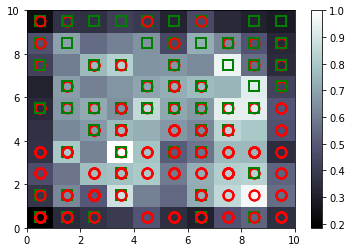

In [25]:
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend

markers = ['o', 's']                     # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [26]:
mappings = som.win_map(X)

In [27]:
mappings

defaultdict(list,
            {(0,
              0): [array([1.        , 0.13278195, 0.05357143, 0.        , 0.38461538,
                     0.375     , 0.01894737, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.06      ]), array([1.        , 0.07894737, 0.0625    , 0.        , 0.53846154,
                     0.375     , 0.08192982, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.056     ]), array([1.        , 0.40857143, 0.01785714, 0.        , 0.46153846,
                     0.375     , 0.01754386, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.065     ]), array([1.        , 0.30451128, 0.19642857, 0.        , 0.53846154,
                     0.375     , 0.05263158, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.03      ]), array([1.        , 0.2681203 , 0.02678571, 0.        , 0.38461538,
                     0.375     , 0.12280702, 0.    

In [28]:
mappings.keys()

dict_keys([(2, 0), (6, 0), (0, 2), (0, 8), (5, 8), (3, 9), (5, 4), (2, 9), (5, 2), (8, 5), (9, 6), (3, 2), (5, 3), (8, 8), (1, 9), (0, 5), (5, 5), (3, 5), (9, 4), (9, 2), (3, 4), (7, 8), (0, 7), (6, 5), (0, 0), (7, 5), (8, 7), (8, 2), (6, 1), (6, 4), (7, 1), (1, 8), (2, 1), (9, 5), (5, 7), (7, 0), (9, 0), (3, 7), (4, 8), (1, 3), (2, 4), (9, 3), (3, 3), (8, 0), (9, 8), (4, 9), (2, 2), (9, 1), (5, 0), (1, 1), (6, 3), (4, 2), (7, 2), (6, 8), (1, 5), (0, 9), (9, 7), (8, 9), (0, 1), (8, 3), (2, 7), (5, 9), (4, 0), (1, 0), (8, 6), (4, 5), (6, 9), (7, 4), (0, 3), (5, 6), (4, 6), (2, 5), (9, 9), (3, 1), (8, 1), (6, 6), (7, 7), (6, 2), (4, 3), (1, 6), (7, 3)])

In [29]:
# out of the 100 segments: 70 segments have customers and other 30 segments don't have any customers mapped to it 
len(mappings.keys())

81

In [30]:
mappings[(9,8)]

[array([1.        , 0.21804511, 0.18      , 0.        , 0.53846154,
        0.5       , 0.05263158, 1.        , 1.        , 0.11940299,
        1.        , 0.5       , 0.072     ]),
 array([1.        , 0.12285714, 0.01928571, 0.        , 1.        ,
        0.375     , 0.00140351, 1.        , 1.        , 0.01492537,
        1.        , 0.5       , 0.42      ]),
 array([1.        , 0.10902256, 0.17107143, 0.        , 0.61538462,
        0.375     , 0.07894737, 1.        , 1.        , 0.01492537,
        1.        , 0.5       , 0.04      ]),
 array([1.        , 0.14781955, 0.01642857, 0.        , 0.61538462,
        0.375     , 0.09210526, 1.        , 1.        , 0.08955224,
        1.        , 0.5       , 0.104     ]),
 array([1.        , 0.19428571, 0.0625    , 0.        , 0.53846154,
        0.375     , 0.03508772, 1.        , 1.        , 0.07462687,
        1.        , 0.5       , 0.08      ]),
 array([1.        , 0.        , 0.14285714, 0.        , 0.61538462,
        0.375     , 0.

In [31]:
# Taking some of the red circular from the heat map and mapping as Frauds:

frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)


In [32]:
frauds

array([[0.        , 0.33082707, 0.03267857, 0.5       , 0.38461538,
        0.375     , 0.02631579, 1.        , 1.        , 0.05970149,
        0.        , 0.5       , 0.        ],
       [0.        , 0.23684211, 0.01642857, 0.5       , 0.23076923,
        0.375     , 0.01894737, 1.        , 1.        , 0.05970149,
        0.        , 0.5       , 0.19      ],
       [0.        , 0.75684211, 0.00589286, 0.5       , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.01492537,
        0.        , 0.5       , 0.116     ],
       [0.        , 0.10030075, 0.26785714, 0.5       , 0.23076923,
        0.375     , 0.05263158, 1.        , 1.        , 0.01492537,
        0.        , 0.5       , 0.08      ],
       [0.        , 0.11278195, 0.08339286, 0.5       , 0.15384615,
        0.5       , 0.01754386, 1.        , 1.        , 0.05970149,
        0.        , 0.        , 0.04      ],
       [0.        , 0.16165414, 0.03714286, 0.        , 0.        ,
        0.        , 0.01754

In [33]:
frauds.shape

(14, 13)

In [34]:
# these are two list of customers
frauds1 = sc.inverse_transform(frauds)

In [35]:
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,35.75,0.915,2.0,6.0,4.0,0.750,1.0,1.0,4.0,0.0,2.0,0.0
1,0.0,29.50,0.460,2.0,4.0,4.0,0.540,1.0,1.0,4.0,0.0,2.0,380.0
2,0.0,64.08,0.165,2.0,1.0,1.0,0.000,1.0,1.0,1.0,0.0,2.0,232.0
3,0.0,20.42,7.500,2.0,4.0,4.0,1.500,1.0,1.0,1.0,0.0,2.0,160.0
4,0.0,21.25,2.335,2.0,3.0,5.0,0.500,1.0,1.0,4.0,0.0,1.0,80.0
5,0.0,24.50,1.040,1.0,1.0,1.0,0.500,1.0,1.0,3.0,0.0,2.0,180.0
6,1.0,33.17,1.000,2.0,14.0,4.0,0.750,1.0,1.0,7.0,1.0,2.0,340.0
7,1.0,34.17,1.540,2.0,13.0,4.0,1.540,1.0,1.0,1.0,1.0,2.0,520.0
8,1.0,25.08,1.710,2.0,14.0,4.0,1.665,1.0,1.0,1.0,1.0,2.0,395.0
9,1.0,39.17,1.710,2.0,14.0,4.0,0.125,1.0,1.0,5.0,1.0,2.0,480.0
